In [37]:
import pandas as pd
import numpy as np
import os
import re
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
MASK = "$T$"

In [39]:
main_folder = os.path.dirname(os.getcwd())
path = os.path.join(main_folder, "strise", "STEP 2 - CSV_WITH_SENTIMENT")
path

'C:\\Users\\Tollef\\Documents\\GitHub\\masterNEW\\REPO\\strise\\STEP 2 - CSV_WITH_SENTIMENT'

In [40]:
ent_df = pd.read_csv(os.path.join(path, "entities.csv"))
ent_df.head()
ent_df.shape

(47267, 9)

## Plotting

In [41]:
def hist_plot(df, col, bins=500):
    _ = plt.hist(df[col], bins=bins)

## Feature management

- Text length
- Sentiment

### Text length

In [42]:
def calc_text_length(row):
    row['text_length'] = len(row['text'])
    return row

# add text length as a column
def add_text_length(df):
    df["text_length"] = np.nan
    return df.apply(lambda row: calc_text_length(row), axis=1)

ent_df = add_text_length(ent_df)

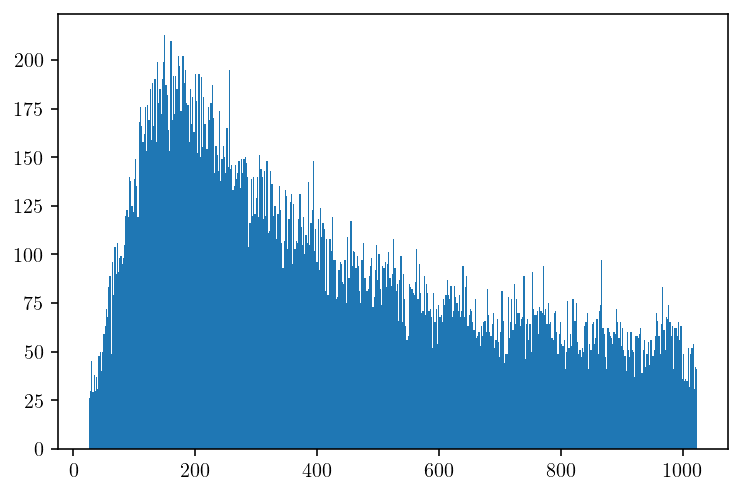

In [43]:
hist_plot(ent_df, "text_length", bins = 500)

Original shape: (47267, 10)
keeping text lengths within 96% of the distribution
min: 63.0, max: 985.0
Dropping 1931 rows
New shape: (45336, 10)


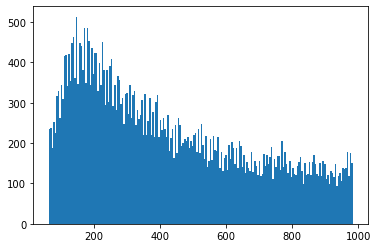

In [9]:
def shorten_texts(df):
    print("Original shape:", df.shape)
    q_min, q_max = (df['text_length'].dropna().quantile([0.02, 0.98]))
    print('keeping text lengths within 96% of the distribution')
    print('min: {}, max: {}'.format(q_min, q_max))
    shortened_texts = df[(df.text_length > q_min) & (df.text_length < q_max)]
    print('Dropping {} rows'.format(df.shape[0] - shortened_texts.shape[0]))
    df = shortened_texts
    print("New shape:", df.shape)
    return df

ent_df = shorten_texts(ent_df)
hist_plot(ent_df, "text_length", bins = 200)

### Sentiment
Findings show that the labeled dataset is _extremely_ balanced

In [14]:
ent_df.head(10)

,Unnamed: 0,Unnamed: 0.1,id,entity_id,name,text,references,sentiment,sentiment_score,text_length
0,0,0,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q130879,Reuters,PANAMA CITY $T$ - Venezuelan president Nicolas...,"Stephen J. Adler,business,Agence Reuters,telec...",-1,0.9983,963
1,1,1,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q170972,Socialist Party,Venezuelan Attorney General Tarek William Saab...,"Parti Socialiste,France,PS,Socialist Party (Fr...",-1,0.9992,716
2,2,2,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q7188,government,socialist $T$ has repeatedly vowed to combat c...,"government,gov,political organisation",-1,0.9994,318
3,3,3,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q58132,Nicolás Maduro,PANAMA CITY (Reuters) - Venezuelan president $...,"trade unionist,Nicolas Maduro Moros,politician...",-1,0.9988,958
4,4,4,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q717,Venezuela,PANAMA CITY (Reuters) - Venezuelan president $...,"Nicolás Maduro,Government of Venezuela,soverei...",-1,0.8981,384
5,5,5,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q717,Venezuela,"2 Diosdado Cabello, the elder brother of late ...","Nicolás Maduro,Government of Venezuela,soverei...",0,1.0000,240
6,6,6,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q717,Venezuela,socialist government has repeatedly vowed to c...,"Nicolás Maduro,Government of Venezuela,soverei...",-1,0.9994,319
7,7,7,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q1227076,Diosdado Cabello,2 $T$ the elder brother of late president Hugo...,"politician,member of the National Assembly of ...",-1,0.9992,559
8,8,8,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q6146383,Tibisay Lucena,Venezuelan Attorney General Tarek William Saab...,"Tibisay Lucena Ramírez,Tibisay Lucena,human",-1,0.9992,717
9,9,9,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q8440,Hugo Chávez,"2 Diosdado Cabello, the elder brother of late ...","Nancy Colmenares,politician,soldier,Hugo Rafae...",-1,0.9993,564


In [44]:
sent_vals = ent_df.sentiment.unique()
sent_range = [min(sent_vals), max(sent_vals)]

 1    21199
-1    18281
 0     7787
Name: sentiment, dtype: int64


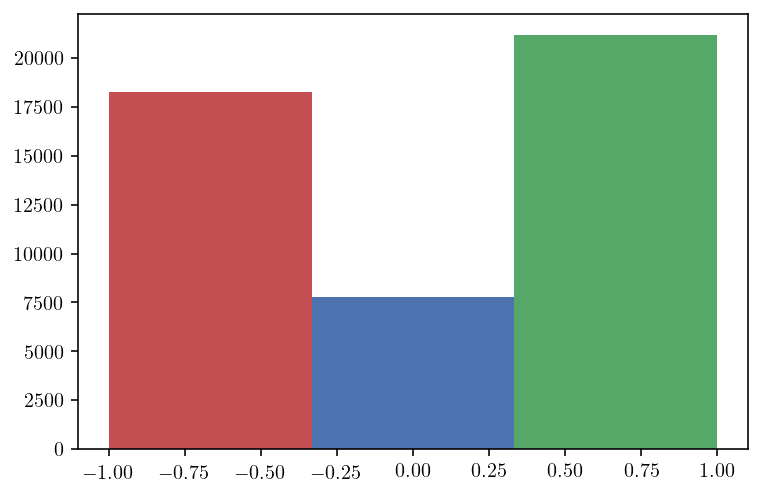

In [45]:
def sentiment_distribution(df):
    dist = df.sentiment.value_counts()
    print(dist)
    n, bins, sentiments = plt.hist(df.sentiment, range=sent_range, bins=3)
    NEG = 'r'
    NEU = 'b'
    POS = 'g'
    sentiments[0].set_fc(NEG)
    sentiments[1].set_fc(NEU)
    sentiments[2].set_fc(POS)

sentiment_distribution(ent_df)

In [46]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('font', **{'size': 24, 'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)
#mpl.rc('text', usetex=False)
import seaborn as sns


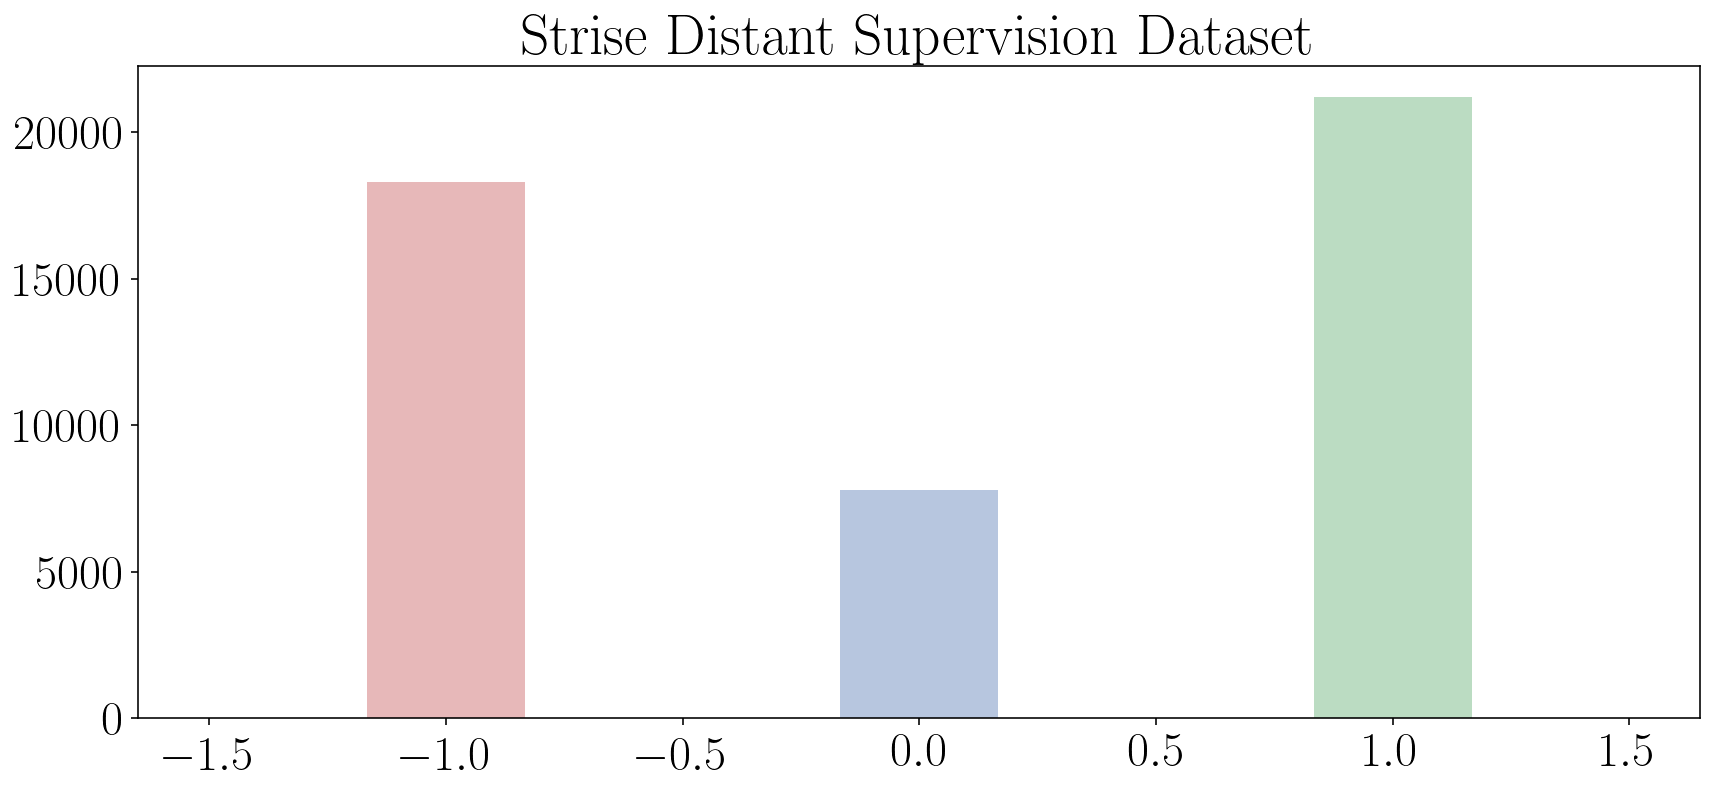

In [47]:

def sns_sent_dist(df, _title="Strise Distant Supervision Dataset"):
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 6)
    #fig.subtitle('Sentiment polarity distribution')
    sns.set_color_codes()
    neg_data = np.array(df.loc[df["sentiment"] == -1].sentiment)
    neu_data = np.array(df.loc[df["sentiment"] == 0].sentiment)
    pos_data = np.array(df.loc[df["sentiment"] == 1].sentiment)
    sent_data = np.array([neg_data, neu_data, pos_data])
    sns.distplot(neg_data, ax=ax, bins=3, kde=False, color="r")
    sns.distplot(neu_data, ax=ax, bins=3, kde=False, color="b")
    sns.distplot(pos_data, ax=ax, bins=3, kde=False, color="g")
    ax.set(title=_title)
    
    plt.savefig("distant_supervision.png", dpi=300, transparent=True)
sns_sent_dist(ent_df)

In [48]:
def get_df_stats(df, folder="all entities", coref=False):
    """
    interesting data points:
    - dataset
    - number of coreference clusters
    - average document length
    - min doc len
    - max doc len
    """
    doclen = np.array(df["text_length"])
    if coref:
        corefs = np.array(df["coref_clusters"])
        num_coref_clusters = round(corefs.mean(), 2)
        tot_clusters = corefs.sum()
    else:
        num_coref_clusters = None
        tot_clusters = None
    try:
        _avg = round(doclen.mean(), 2)
        _min = round(doclen.min(), 2)
        _max = round(doclen.max(), 2)
        ndocs = len(doclen)
    
        return [folder, ndocs, _avg, _min, _max, num_coref_clusters, tot_clusters]
    except:
        print(doclen)
        print(corefs)
get_df_stats(ent_df)

['all entities', 47267, 429.59, 25, 1024, None, None]

['business_entities.csv', 11771, 426.2, 25, 1024, None, None]
['politics_entities.csv', 12405, 416.88, 25, 1024, None, None]
['sports_entities.csv', 12233, 449.14, 25, 1024, None, None]
['tech_entities.csv', 10858, 425.74, 25, 1024, None, None]


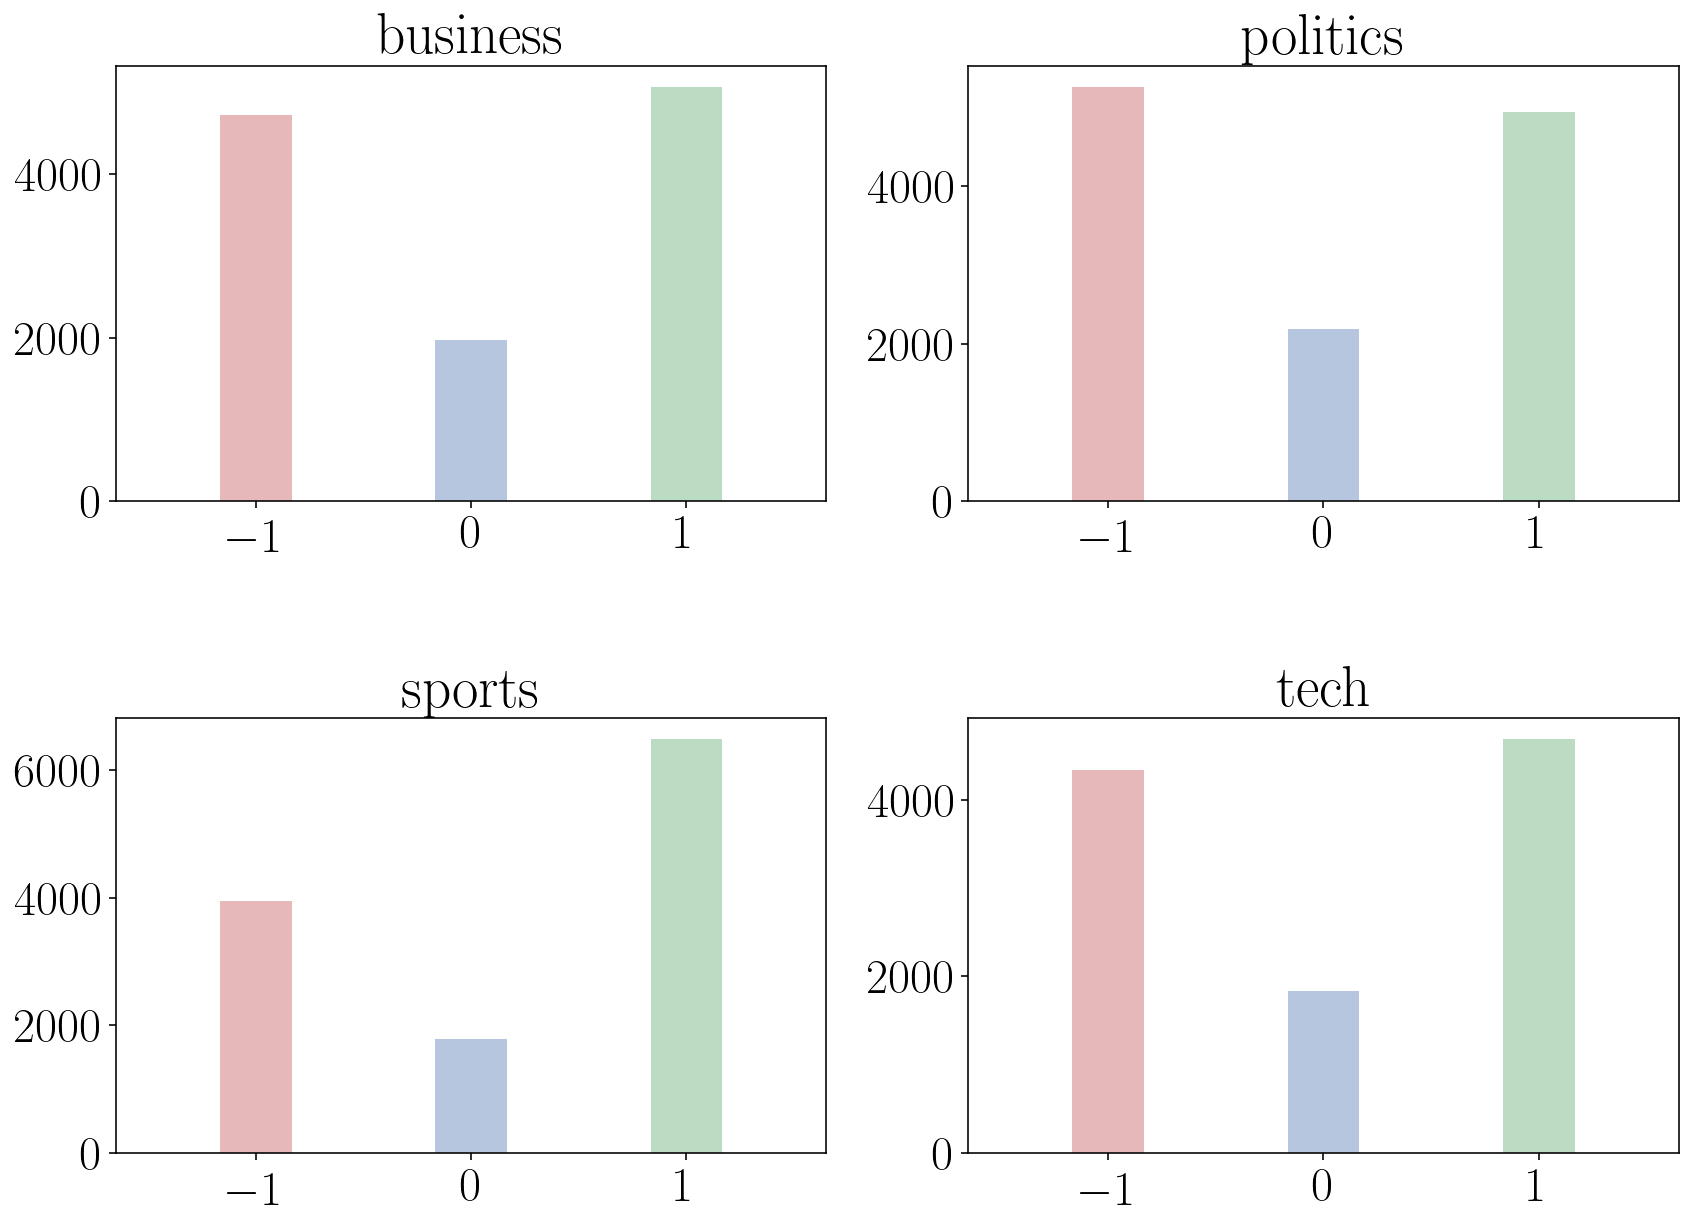

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(14, 10)
#fig.subtitle('Sentiment polarity distribution')
axes = axes.flatten()
sns.set_color_codes()

data_count = 0
for topicfile in os.listdir(path):
    if topicfile == "entities.csv" or topicfile == "info.txt":
        continue
        
    topic_path = os.path.join(path, topicfile)
    topic_df = pd.read_csv(topic_path)
    topic_df = add_text_length(topic_df)
    #topic_df = shorten_texts(topic_df)

    
    neg_data = np.array(topic_df.loc[topic_df["sentiment"] == -1].sentiment)
    neu_data = np.array(topic_df.loc[topic_df["sentiment"] == 0].sentiment)
    pos_data = np.array(topic_df.loc[topic_df["sentiment"] == 1].sentiment)
    sent_data = np.array([neg_data, neu_data, pos_data])
    ax = axes[data_count]
    sns.distplot(neg_data, ax=ax, bins=3, kde=False, color="r")
    sns.distplot(neu_data, ax=ax, bins=3, kde=False, color="b")
    sns.distplot(pos_data, ax=ax, bins=3, kde=False, color="g")
    ax.set(title=topicfile.split("_")[0])
    print(get_df_stats(topic_df, topicfile))
    data_count += 1
    
plt.savefig("topic_sentiment.png", dpi=300, transparent=True)

In [50]:
def get_opinion_extremes(df, sent, top=10):
    df = df[df.sentiment==sent].sort_values(by='sentiment_score', ascending=False)[:top]
    for n, v in zip(df.name.values, df.text.values):
        print(v)
        print("---", n)
        print()

In [51]:
get_opinion_extremes(ent_df, -1)

Inferences do help $T$ establishing a tenet, but ideas seem half-baked and are too generalised. More importantly, as the author tries to shift focus from one technology to another, he completely misses out on delving deeper into the issues and only addresses them superficially. Generalised statements like there will be a need for new organising principles or structures for families, industries, and countries do not provide any insight into what these structures or organising principles might be. One of the critical problems with inferencing is assuming that our society would behave like the western one, which has proved to be a fallacy as far as interactions with technology are concerned. Thus, the work does not do justice to the idea of decoding the future. Also, the report-like writing becomes boring and repetitive, because of which the reader is bound to lose interest.
--- India

$T$ A situation in which one player's gain is equivalent to another's loss the net change in wealth or b

In [52]:
get_opinion_extremes(ent_df, 0)

2 Diosdado Cabello, the elder brother of late president Hugo Chavez, and 16 firms in $T$ The economy and finance National Commission Against Money Laundering released the list late on Thursday, following its initial announcement on Tuesday.
--- Venezuela

Huffer began selling $T$ in retailers such as Cheapskates and after 14 years in business, opened its first retail store in Newmarket in 2011. It opened its first Australian store at Bondi Beach in Sydney, then one in Newtown and Melbourne.
--- clothing

The company's headquarters are in $T$ with additional offices in Manchester, London, New York and Munich. Contact Jana Walker Investor Relations 30-Dec-2019 The DGAP Distribution Services include Regulatory Announcements, News and Press Releases.
--- Berlin

Archive at www.dgap.de Language English Company The Social Chain AG 22 10119 $T$ Germany Phone 49 (0)30 120840112 E-mail Internet www.lumaland.com ISIN DE000A1YC996 WKN A1YC99 Listed Regulated Unofficial Market in Dusseldorf EQS Ne

In [53]:
get_opinion_extremes(ent_df, 1)

All of these projects illustrate how newsrooms truly work to serve the American $T$ The reporters and staff who worked on these projects fulfilled USA TODAY commitment to impactful journalism, and an accomplishment in and of itself, said Randy Lovely, vice president for community news for the USA TODAY NETWORK. It is, of course, also wonderful to see our reporters and staff earn recognition from such a prestigious national organization for their work as well.
--- human

Learn more about Diversified's comprehensive portfolio of solutions and service offerings at About $T$ Of The Year $T$ Of The founded by EY, is the world's most prestigious business awards program for entrepreneurs, chosen from an independent panel of judges including entrepreneurs and prominent leaders from business, finance, and the local community. The program makes a difference through the way it encourages entrepreneurial activity among those with potential and recognizes the contribution of people who inspire othe

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
def format_parentheses(df):
    # this is how the sentiment models are designed to handle parentheses.
    def replace_paren(row):
        text = row["text"]
        text = text.replace("(", "-LRB-")
        text = text.replace(")", "-RRB-")
        row["text"] = text
        return row
    return df.apply(lambda row: replace_paren(row), axis=1)

In [27]:
pre_split = format_parentheses(ent_df)
train, test = train_test_split(pre_split, test_size=0.1, random_state=4242, stratify=ent_df[["sentiment"]])

# Target leakage..?

In [93]:
train_ids = set(train.id)
test_ids = set(test.id)

In [94]:
for tr_id in train_ids:
    if tr_id in test_ids:
        print(tr_id)
        break

# YEP! fix this by splitting on IDs rather than random split

In [55]:
ent_df.drop(ent_df.columns[[0, 1]], axis=1, inplace=True)

In [58]:
ent_df.head(3)

,id,entity_id,name,text,references,sentiment,sentiment_score,text_length
0,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q130879,Reuters,PANAMA CITY $T$ - Venezuelan president Nicolas...,"Stephen J. Adler,business,Agence Reuters,telec...",-1,0.9983,963
1,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q170972,Socialist Party,Venezuelan Attorney General Tarek William Saab...,"Parti Socialiste,France,PS,Socialist Party (Fr...",-1,0.9992,716
2,IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...,Q7188,government,socialist $T$ has repeatedly vowed to combat c...,"government,gov,political organisation",-1,0.9994,318


In [59]:
ent_ids = ent_df.id
ent_ids

0        IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...
1        IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...
2        IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...
3        IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...
4        IjdiYTA5NGY1ZTZiOTI2OTFhOWYyZjgzNzBmMzdjNWE5Mz...
                               ...                        
47262    IjNlNjkxZmQ0OGQ4MWIwZmU0MDk3NGI4Y2JlYjA4YjEwMD...
47263    IjNlNjkxZmQ0OGQ4MWIwZmU0MDk3NGI4Y2JlYjA4YjEwMD...
47264    IjNlNjkxZmQ0OGQ4MWIwZmU0MDk3NGI4Y2JlYjA4YjEwMD...
47265    IjNlNjkxZmQ0OGQ4MWIwZmU0MDk3NGI4Y2JlYjA4YjEwMD...
47266    IjNlNjkxZmQ0OGQ4MWIwZmU0MDk3NGI4Y2JlYjA4YjEwMD...
Name: id, Length: 47267, dtype: object

In [69]:
# get unique ids:
uniq_ids = list(set(ent_ids))

In [70]:
len(uniq_ids)

3330

## Selection of IDs
- As 1 id corresponds to multiple documents, the percentage of IDs won't correspond directly to the final segmented data

In [71]:
from random import choices
ten_percent = len(uniq_ids) // 10
test_ids = choices(uniq_ids, k = ten_percent)
len(test_ids)

333

In [72]:
_sample = test_ids[0]

In [85]:
test = ent_df[ent_df.id.isin(test_ids)]

In [86]:
train = ent_df[~ent_df.id.isin(test_ids)]

 1    19355
-1    16739
 0     7022
Name: sentiment, dtype: int64


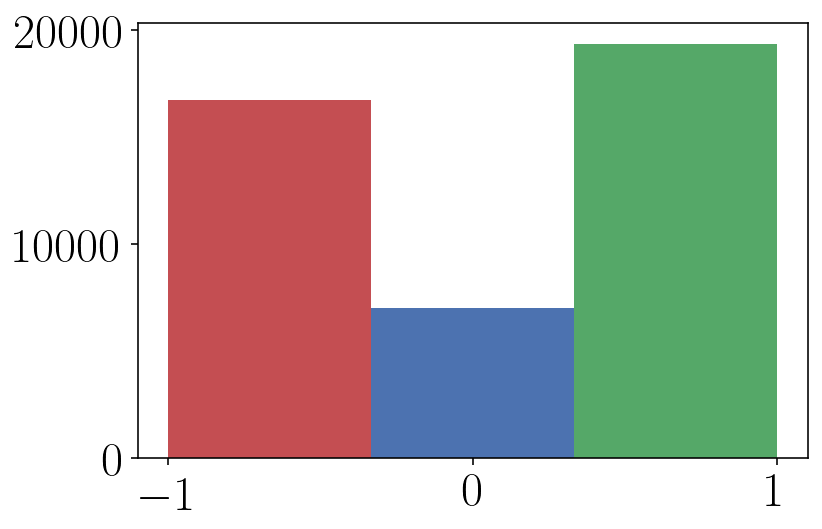

In [87]:
sentiment_distribution(train)

 1    1844
-1    1542
 0     765
Name: sentiment, dtype: int64


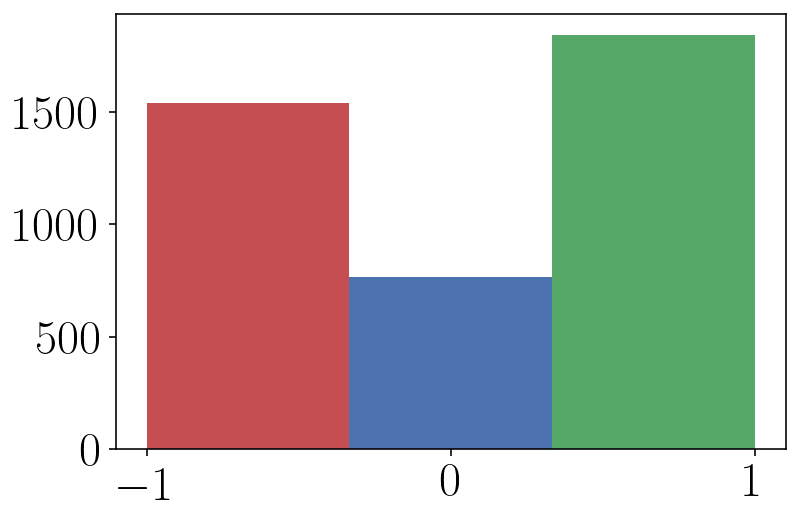

In [88]:
sentiment_distribution(test)

In [89]:
# the DFs in the correct .xml.seg format, based around ACL14 and SemEval14
# TEXT
# TARGET
# SENTIMENT

def _write(f, data):
    f.write(data)
    f.write("\n")
    
def save_row(f, row):
    text = row['text']
    sentiment = str(row['sentiment'])
    target = row['name']

    _write(f, text)
    _write(f, target)
    _write(f, sentiment)


In [90]:
save_folder = "STEP 3 - ABSA-format"
save_path = os.path.join(os.getcwd(), save_folder)


In [91]:
train_path = os.path.join(save_path, "{}_distant_train.litesent".format("entities"))
with open(train_path, 'w', encoding="utf8") as f:
    [save_row(f, row) for idx, row in train.iterrows()]

In [92]:
test_path = os.path.join(save_path, "{}_distant_test.litesent".format("entities"))
with open(test_path, 'w', encoding="utf8") as f:
    [save_row(f, row) for idx, row in test.iterrows()]

In [88]:
both = pd.concat([train, test])

In [89]:
both_path = os.path.join(save_path, "distant_supervision_big.seg")
with open(both_path, 'w', encoding="utf8") as f:
    [save_row(f, row) for idx, row in both.iterrows()]

# Save entire files, no splitting

In [29]:
for topicfile in os.listdir(path):
    if not "entities" in topicfile:
        continue

    topic_path = os.path.join(path, topicfile)
    topic_df = pd.read_csv(topic_path)
    topic_df = format_parentheses(topic_df)
    
    topicname = topicfile.split("_")[0]
    
    _path = os.path.join(save_path, "{}_distant.litesent".format(topicname))
    
    with open(_path, 'w', encoding="utf8") as f:
        [save_row(f, row) for idx, row in topic_df.iterrows()]

# Sample randomly and save it

In [32]:
_path = os.path.join(save_path, "{}_distant.litesent".format("100entities"))

_entity_df = pd.read_csv(os.path.join(path, "entities.csv"))
_entity_df = format_parentheses(_entity_df)
sample = _entity_df.sample(n=100)

with open(_path, 'w', encoding="utf8") as f:
    [save_row(f, row) for idx, row in sample.iterrows()]

# Save the files
## Iterate all files and generate train/test splits

In [114]:
for topicfile in os.listdir(path):
    topic_path = os.path.join(path, topicfile)
    topic_df = pd.read_csv(topic_path)
    topic_df = add_text_length(topic_df)
    topic_df = shorten_texts(topic_df)
    
    train, test = train_test_split(topic_df, test_size=0.1, random_state=4242, stratify=topic_df[["sentiment"]])
    
    topicname = topicfile.split("_")[0]
    
    train_path = os.path.join(save_path, "{}_distant_train.litesent".format(topicname))
    test_path = os.path.join(save_path, "{}_distant_test.litesent".format(topicname))
    
    with open(train_path, 'w', encoding="utf8") as f:
        [save_row(f, row) for idx, row in train.iterrows()]
    with open(test_path, 'w', encoding="utf8") as f:
        [save_row(f, row) for idx, row in test.iterrows()]
        
    if topicfile == "entities.csv":
        both = pd.concat([train, test])
        both_path = os.path.join(save_path, "distant_all_data.litesent")
        with open(both_path, 'w', encoding="utf8") as f:
            [save_row(f, row) for idx, row in both.iterrows()]

Original shape: (5346, 11)
keeping text lengths within 80% of the distribution
min: 46.0, max: 673.9999999999891
Dropping 215 rows
New shape: (5131, 11)
Original shape: (19758, 11)
keeping text lengths within 80% of the distribution
min: 45.0, max: 603.8600000000006
Dropping 811 rows
New shape: (18947, 11)
Original shape: (5922, 11)
keeping text lengths within 80% of the distribution
min: 44.0, max: 609.5799999999999
Dropping 243 rows
New shape: (5679, 11)
Original shape: (3948, 11)
keeping text lengths within 80% of the distribution
min: 46.0, max: 544.1199999999999
Dropping 160 rows
New shape: (3788, 11)
Original shape: (4542, 11)
keeping text lengths within 80% of the distribution
min: 43.0, max: 581.0
Dropping 184 rows
New shape: (4358, 11)
